2.
Logistic Regression: You are given a dataset named football.csv containing information about football players. Your task is to build a machine learning model to classify whether a player’s contribution type is more inclined towards being type 1 or 0, where 1 indicates players with contributions in the attacking half of the football field and 0 indicates players with contributions in the defending half of the field. The classification column is “contribution
type”.

(a) Train a Logistic Regression model using the training data. Implement logistic regression
from scratch. You’re NOT ALLOWED to use sklearn for this question.

(b) Make predictions on the test data using the trained model.

(c) Calculate the F1 score, accuracy score, and confusion matrix to evaluate the model’s
performance.

In [1]:
import csv
def load_data(filename):
    dataset = []
    csvfile = open(filename, newline = '')
    reader = csv.reader(csvfile)
    for i in reader:
        dataset.append(i)
    return dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp

path_link = "/content/drive/MyDrive/ML_assignment/football.csv"
dataframe = pd.read_csv(path_link)
dataframe.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


In [4]:
dataframe = dataframe.drop(['club_team_id','club_name','league_name','club_jersey_number','nation_jersey_number','preferred_foot','work_rate','body_type','player_tags','player_traits','sofifa_id','short_name'],axis=1)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7706 non-null   float64
 3   wage_eur                     7711 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   league_level                 7711 non-null   float64
 8   weak_foot                    7772 non-null   int64  
 9   skill_moves                  7772 non-null   int64  
 10  international_reputation     7772 non-null   int64  
 11  release_clause_eur           7306 non-null   float64
 12  pace                         7063 non-null   float64
 13  shooting          

In [6]:
median_value = dataframe['value_eur'].median()
dataframe['value_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['wage_eur'].median()
dataframe['wage_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['league_level'].median()
dataframe['league_level'].fillna(value=median_value,inplace=True)

median_value = dataframe['release_clause_eur'].median()
dataframe['release_clause_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['pace'].median()
dataframe['pace'].fillna(value=median_value,inplace=True)

median_value = dataframe['shooting'].median()
dataframe['shooting'].fillna(value=median_value,inplace=True)

median_value = dataframe['passing'].median()
dataframe['passing'].fillna(value=median_value,inplace=True)

median_value = dataframe['dribbling'].median()
dataframe['dribbling'].fillna(value=median_value,inplace=True)

median_value = dataframe['defending'].median()
dataframe['defending'].fillna(value=median_value,inplace=True)

median_value = dataframe['physic'].median()
dataframe['physic'].fillna(value=median_value,inplace=True)

median_value = dataframe['goalkeeping_speed'].median()
dataframe['goalkeeping_speed'].fillna(value=median_value,inplace=True)


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7772 non-null   float64
 3   wage_eur                     7772 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   league_level                 7772 non-null   float64
 8   weak_foot                    7772 non-null   int64  
 9   skill_moves                  7772 non-null   int64  
 10  international_reputation     7772 non-null   int64  
 11  release_clause_eur           7772 non-null   float64
 12  pace                         7772 non-null   float64
 13  shooting          

In [35]:
class Standardizer:
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

for feature in dataframe.columns:
    dataframe[feature] = dataframe[feature].apply(Standardizer(dataframe[feature].mean(), dataframe[feature].std()).scale)

In [42]:
#features
X= dataframe.drop(columns=['contribution_type']).to_numpy()
#target variables
Y= dataframe['contribution_type'].to_numpy()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

***2a. Train a Logistic Regression model using the training data. Implement logistic regression from scratch***

In [43]:
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt

class LogisticRegression:
    def sigmoid(self,z):
        sigmoid1 = 1/(1+exp(-z))
        return sigmoid1
    def initialize(self,X):
        wts = np.zeros((shape(X)[1]+1,1))
        x = np.c_[np.ones((shape(X)[0],1)),X]
        return wts,x
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            ct0 = y.T.dot(log(self.sigmoid(z)))
            ct1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            ct = -((ct1 + ct0))/len(y)
            return ct
        ct_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha * np.dot(X.T,self.sigmoid(np.dot(X,weights))-np.reshape(y,(len(y),1)))
            ct_list[i] = cost(weights)
        self.weights = weights
        return ct_list
    def predict1(self,X):
        z = np.dot(self.initialize(X)[1],self.weights)
        list1 = []
        for i in self.sigmoid(z):
            if i>0.5:
                list1.append(1)
            else:
                list1.append(0)
        return list1





 ***2b. Making predictions on the test data using the trained model.***

In [38]:
log_regr = LogisticRegression()
model= log_regr.fit(X_train,Y_train)
y_pred = log_regr.predict1(X_test)

<ipython-input-37-3aeae4161525>:22: RuntimeWarning: divide by zero encountered in log
  ct1 = (1-y).T.dot(log(1-self.sigmoid(z)))
<ipython-input-37-3aeae4161525>:11: RuntimeWarning: overflow encountered in exp
  sigmoid1 = 1/(1+exp(-z))
<ipython-input-37-3aeae4161525>:21: RuntimeWarning: divide by zero encountered in log
  ct0 = y.T.dot(log(self.sigmoid(z)))


***2c. Calculate the F1 score, accuracy score, and confusion matrix to evaluate the model’s performance.***

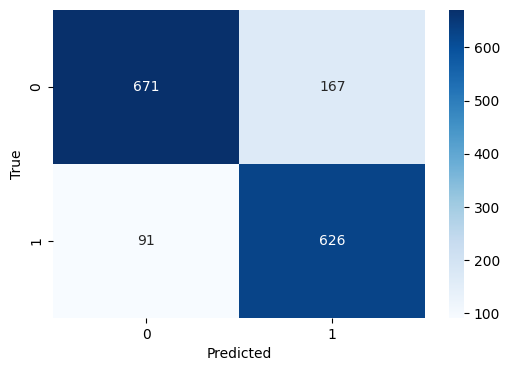

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

threshold = 0.5
Y_test = (Y_test > threshold).astype(int)
co = confusion_matrix(Y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(co, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [41]:
from sklearn.metrics import f1_score, accuracy_score
f = f1_score(Y_test, y_pred)
accu = accuracy_score(Y_test, y_pred)
print("F1 Score:", f)
print("Accuracy:", accu)

F1 Score: 0.8291390728476822
Accuracy: 0.8340836012861736
